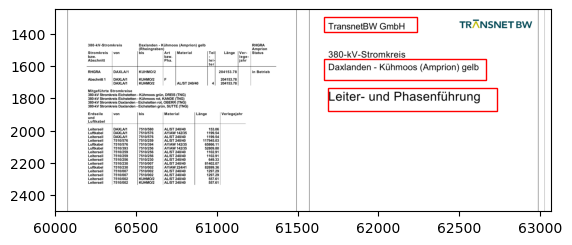

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json

# l shows lines

Image.MAX_IMAGE_PIXELS = None

doc_name = '000-0000-00000-99-SP-005-00005-00_Leiter- und Phasenführungsplan RHGRA'

# Load the JSON data
json_path = rf'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\png_output_label\{doc_name}.pdf.labels.json'
with open(json_path, 'r') as f:
    data = json.load(f)

# Load the image
# Assuming the image is saved in the same directory with the same name but different extension (e.g., .png or .jpg)
image_path = rf'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\PNG_Output\{doc_name}.png'
img = Image.open(image_path)

# Create a plt figure
fig, ax = plt.subplots(1)
ax.imshow(img)

# Extract and draw each bounding box
for label in data['labels']:
    for value in label['value']:
        for bbox in value['boundingBoxes']:
            # Convert bbox coordinates from normalized to absolute
            width, height = img.size
            bbox_abs = [bbox[0] * width, bbox[1] * height, (bbox[4] - bbox[0]) * width, (bbox[5] - bbox[1]) * height]
            
            # Create a Rectangle patch
            rect = patches.Rectangle((bbox_abs[0], bbox_abs[1]), bbox_abs[2], bbox_abs[3], linewidth=1, edgecolor='r', facecolor='none')
            
            # Add the patch to the Axes
            ax.add_patch(rect)
            

plt.xlim(60000, None)  # Update these values based on the region you want to focus on
plt.ylim(1250, 2500)  # Note: y-axis values go from top to bottom

# Invert y-axis to display the image with the correct orientation
plt.gca().invert_yaxis()

# Show the plot
plt.show()

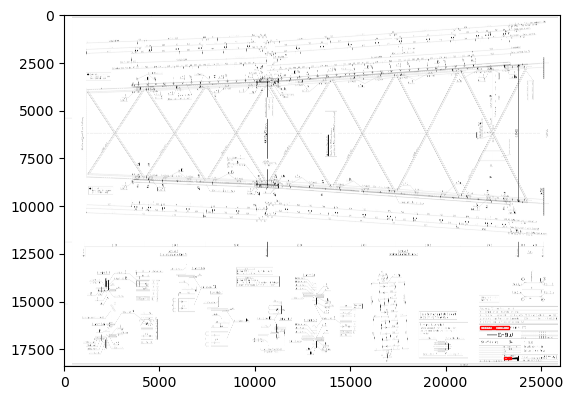

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json
document_name = 'Werkstattzeichnung_B4-Tx-22,85 Zusatzeckstiel Schuß 3+4 Fuß Anlage 5110 Mast 007_MASTVERSTAERKUNGEN_Einzelmast.tiff'
# Load the JSON data
json_path = fr'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\png_with_label\{document_name}.pdf.labels.json'
with open(json_path, 'r') as f:
    data = json.load(f)

# Load the image
# Assuming the image is saved in the same directory with the same name but different extension (e.g., .png or .jpg)
image_path = fr'C:\Users\lukask\Coding\Interface Projects\Table_Recognition\Complete_Data\png_with_label\{document_name}.png'
img = Image.open(image_path)

# Create a plt figure
fig, ax = plt.subplots(1)
ax.imshow(img)

# Extract and draw each bounding box
for label in data['labels']:
    for value in label['value']:
        for bbox in value['boundingBoxes']:
            # Convert bbox coordinates from normalized to absolute
            width, height = img.size
            bbox_abs = [bbox[0] * width, bbox[1] * height, (bbox[4] - bbox[0]) * width, (bbox[5] - bbox[1]) * height]
            
            # Create a Rectangle patch
            rect = patches.Rectangle((bbox_abs[0], bbox_abs[1]), bbox_abs[2], bbox_abs[3], linewidth=1, edgecolor='r', facecolor='none')
            
            # Add the patch to the Axes
            ax.add_patch(rect)

plt.show()


# Putting bounding boxes over jsonl with min max bounding box

PRinting bbox:


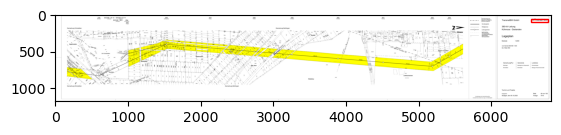

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import json

# Define the image you want to display and its corresponding file name
image_filename = '000-7510-00000-99-GP-025-00003-00_Lageplan 7510_4_Gerüst_EICHS_1_B_8_-_Mast_262_3.png'
image_path = fr'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_1_1_ground_truth\{image_filename}'
img = Image.open(image_path)

# Create a plt figure
fig, ax = plt.subplots(1)
ax.imshow(img)

# Path to the JSON Lines file
jsonl_path = r'C:\Users\lukask\Coding\Interface Projects\Detection\Complete_Data\fichtner_dataset_v2\png_with_label_downscaled_1_1_ground_truth\metadata.jsonl'

# Read each line from the JSON Lines file
with open(jsonl_path, 'r') as f:
    for line in f:
        data = json.loads(line)
        
        # Check if the current JSON line corresponds to the image you are interested in
        if data['file_name'] == image_filename:
            # Read the bounding box from the 'target_bounding_box' key
            bbox = data['target_bounding_box']
            
            # Convert bbox coordinates from normalized to absolute
            print("PRinting bbox:")
            width, height = img.size
            xmin = data['target_bounding_box']['xmin'] * width
            xmax = data['target_bounding_box']['xmax'] * width
            ymin = data['target_bounding_box']['ymin'] * height
            ymax = data['target_bounding_box']['ymax'] * height
#             xmin = 0.8220018885741266 * width
#             xmax = 0.8320018885741266 * width
#             ymin = 0.29209295166271087 * height
#             ymax = 0.30209295166271087 * height
            bbox_width = xmax - xmin
            bbox_height = ymax - ymin

            # Create a Rectangle patch
            rect = patches.Rectangle((xmin, ymin), bbox_width, bbox_height, linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

            # Since you found the matching image, you can now display the result
            plt.show()
            break  # Stop reading further as you've found and processed the desired image
